<a href="https://colab.research.google.com/github/johannesheesterman/lab/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange

In [22]:
mnist_test = pd.read_csv('sample_data/mnist_test.csv').to_numpy()
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv').to_numpy()

test_labels = mnist_test[::, :1].flatten()
test_data = mnist_test[::, 1:]

train_labels = mnist_train[::, :1].flatten()
train_data = mnist_train[::, 1:]

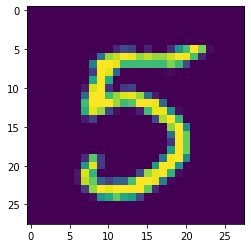

In [23]:
plt.imshow(train_data[0].reshape(28, 28))

In [30]:
class NNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(784, 128)
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128, 10)
  
  def forward(self, x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x

model = NNet()

In [31]:
bs = 32
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

t = trange(1000)
for i in t:
  samp = np.random.randint(0, len(train_labels), size=(bs))
  optimizer.zero_grad()
  out = model(torch.tensor(train_data[samp]).float())
  
  loss = loss_function(out, torch.tensor(train_labels[samp]))
  loss.backward()
  optimizer.step()


100%|██████████| 1000/1000 [00:08<00:00, 115.52it/s]


9

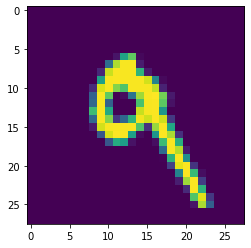

In [39]:
ix = 6
plt.imshow(test_data[ix].reshape(28, 28))
torch.argmax(model(torch.tensor(test_data[ix]).float())).item()